In [78]:
import pandas as pd
import spacy
from tqdm import tqdm
import numpy as np
nlp = spacy.load('en_core_web_sm')

In [79]:
#Leer cvs
data=pd.read_csv('Data/amazon_reviews.csv')

#Mostrar 10 primeras data
data.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [80]:
#Eliminar Columnas irrelevantes
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(['reviewerName', 'helpful_yes', 'helpful_no', 'reviewTime','day_diff','score_pos_neg_diff','score_average_rating'],
          axis=1, inplace=True)

In [81]:
#Borramos los datos nulos existentes debido a que representan
#Un valor insignificante ante el dataset completo
data=data.dropna()

In [82]:
# De acuerdo al rating crearemos una nueva columna que clasificara el sentimiento del texto como positivo (2), negativo (0) o neutro (1)

# Definimos las condiciones
conditions = [
    data['overall'].isin([1, 2]),
    data['overall'] == 3,
    data['overall'].isin([4, 5])
]

# Definimos las opciones
unique_sentiments = [0, 1, 2]
unique_label_sentiments = ['negative', 'neutral', 'positive']

# Creamos la nueva columna
data['sentiment'] = np.select(conditions, unique_sentiments)
data['sentiment_label'] = np.select(conditions, unique_label_sentiments)

data.head(40)

,overall,reviewText,total_vote,wilson_lower_bound,sentiment,sentiment_label
0,4.0,No issues.,0,0.000000,2,positive
1,5.0,"Purchased this for my device, it worked as adv...",0,0.000000,2,positive
2,4.0,it works as expected. I should have sprung for...,0,0.000000,2,positive
3,5.0,This think has worked out great.Had a diff. br...,0,0.000000,2,positive
4,5.0,"Bought it with Retail Packaging, arrived legit...",0,0.000000,2,positive
5,5.0,It's mini storage. It doesn't do anything els...,0,0.000000,2,positive
6,5.0,I have it in my phone and it never skips a bea...,0,0.000000,2,positive
7,5.0,It's hard to believe how affordable digital ha...,0,0.000000,2,positive
8,5.0,Works in a HTC Rezound. Was running short of ...,1,0.206549,2,positive
9,5.0,"in my galaxy s4, super fast card, and am total...",0,0.000000,2,positive


In [83]:
# Guardamos los textos y los sentimientos en listas para normalizarlos
texts = data['reviewText'].tolist()
sentiments_labels = data['sentiment_label'].tolist()

In [84]:
# Verificamos el primer elementos de los arreglos
print(texts[1])
print(sentiments_labels[1])

Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.
positive


In [85]:
import re

# Creamos la funcion para normalizar los textos
def normalize(sentences):
    normalized_sentences = []
    for sentence in tqdm(sentences):
        # Convertir a minúsculas y eliminar caracteres no alfabéticos y números
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence.lower())
        
        # Tokenizar y lematizar usando Spacy
        doc = nlp(sentence)
        normalized_sentence = " ".join([word.lemma_ for word in doc if (not word.is_punct)
                                        and (len(word.text) > 2) and (not word.is_stop)])
        
        normalized_sentences.append(normalized_sentence)
    
    return normalized_sentences

In [86]:
# Aplicamos la normalizacion
texts = normalize(texts)

100%|██████████| 4914/4914 [00:34<00:00, 143.87it/s]


In [87]:
print(texts[1])
print(sentiments_labels[1])

purchase device work advertise phone memory download lot stuff brainer
positive


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)

# Pasamos los textos normalizados al vectorizador para crear la bolsa de palabras
texts = vectorizer.fit_transform(texts)

In [89]:
from sklearn.model_selection import train_test_split  

# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(texts, sentiments_labels, test_size=0.2, random_state=42)

print('Número de Tweets para el entrenamiento: {num}'.format(num=x_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=x_test.shape[0]))

Número de Tweets para el entrenamiento: 3931
Número de Tweets para el test: 983


In [90]:
print(x_test[0])

  (0, 3834)	0.4195583805424385
  (0, 1044)	0.2625455836141904
  (0, 392)	0.3176061943138093
  (0, 684)	0.29054758492844096
  (0, 2535)	0.22256013905319552
  (0, 2)	0.20311701829183723
  (0, 4056)	0.19330438812859382
  (0, 2920)	0.20064808576051327
  (0, 611)	0.1829634924875555
  (0, 1828)	0.14528102346042063
  (0, 2362)	0.2785569148282678
  (0, 2685)	0.21419304991756521
  (0, 2667)	0.3132256341642493
  (0, 4575)	0.14815035306856197
  (0, 1268)	0.11248599249535285
  (0, 313)	0.11613878673884696
  (0, 348)	0.23850740518941296
  (0, 2030)	0.11394485745973727
  (0, 4840)	0.08490595793998343


In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Creamos diferentes clasificadores para comparar su rendimiento
mnb = MultinomialNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
rf_50 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

# Creamos un diccionario con los clasificadores
clasificadores = {
    'Multinomial NB': mnb,
    'Regresion Logistica': lr,
    'SVM lineal': svm_lin,
    'Random Forest d_50': rf_50
}

# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(x_train, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM lineal
CREANDO MODELO: Random Forest d_50


In [92]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Para cada modelo calcularemos el accuracy, precision, recall y f1-score

# Creamos una funcion que devuelve un diccionario de las metricas de evaluacion del modelo
def evaluation(model, name, x_train, y_train, x_test, y_test):
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    return model_dict

In [93]:
# Calculamos las metricas de cada modelo
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 x_train=x_train, y_train=y_train,
                                 x_test=x_test, y_test=y_test))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

In [94]:
# Pasamos las metricas a un DataFrame
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial NB,0.903332,0.911495,0.816010,0.832598,0.903332,0.911495,0.857454,0.870262
Regresion Logistica,0.936149,0.929807,0.907407,0.896715,0.936149,0.929807,0.917537,0.907123
SVM lineal,0.957517,0.934893,0.958171,0.902571,0.957517,0.934893,0.943912,0.916614
Random Forest d_50,0.973289,0.912513,0.974056,0.853287,0.973289,0.912513,0.970167,0.873121


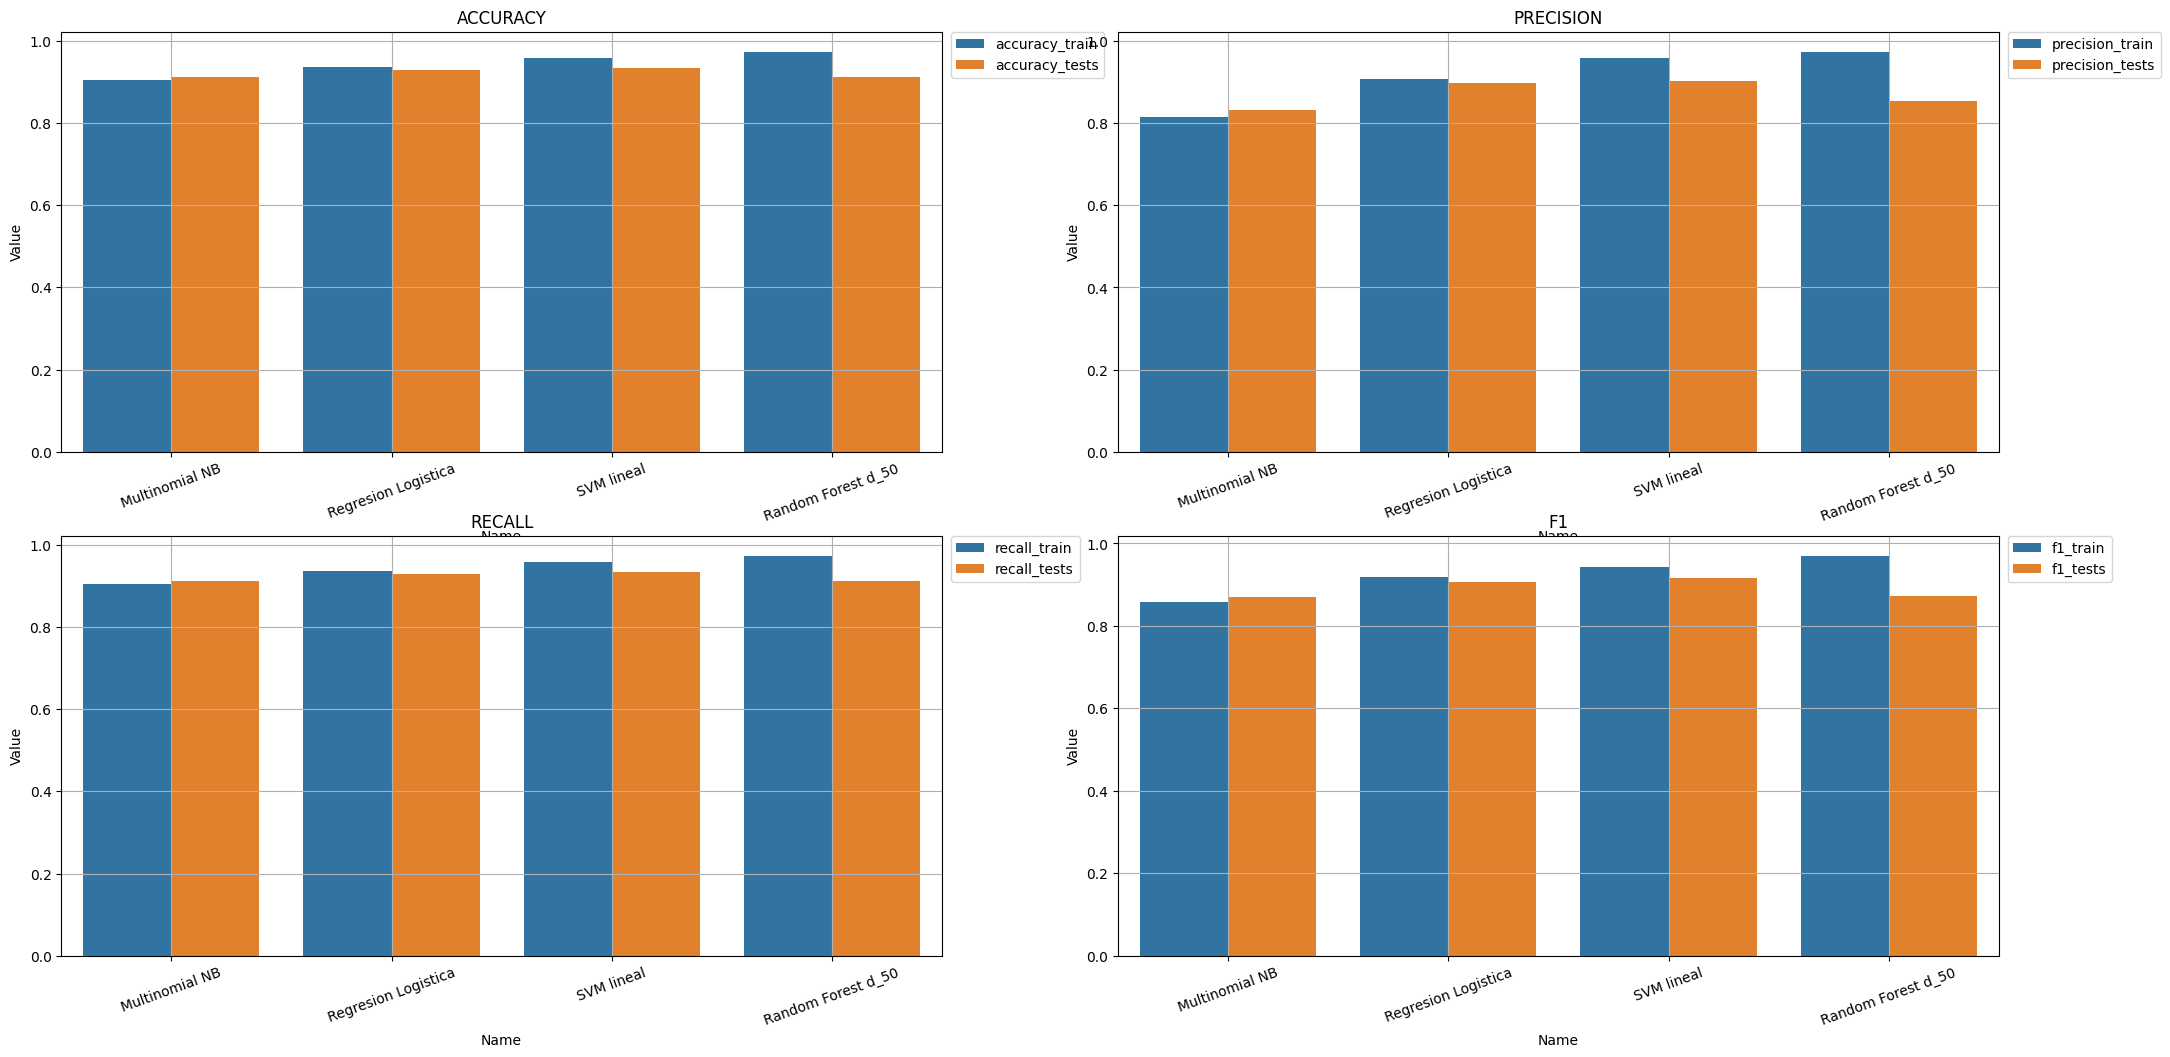

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()


Obteniendo Matriz de Confusión de: Multinomial NB
Obteniendo Matriz de Confusión de: Regresion Logistica
Obteniendo Matriz de Confusión de: SVM lineal
Obteniendo Matriz de Confusión de: Random Forest d_50


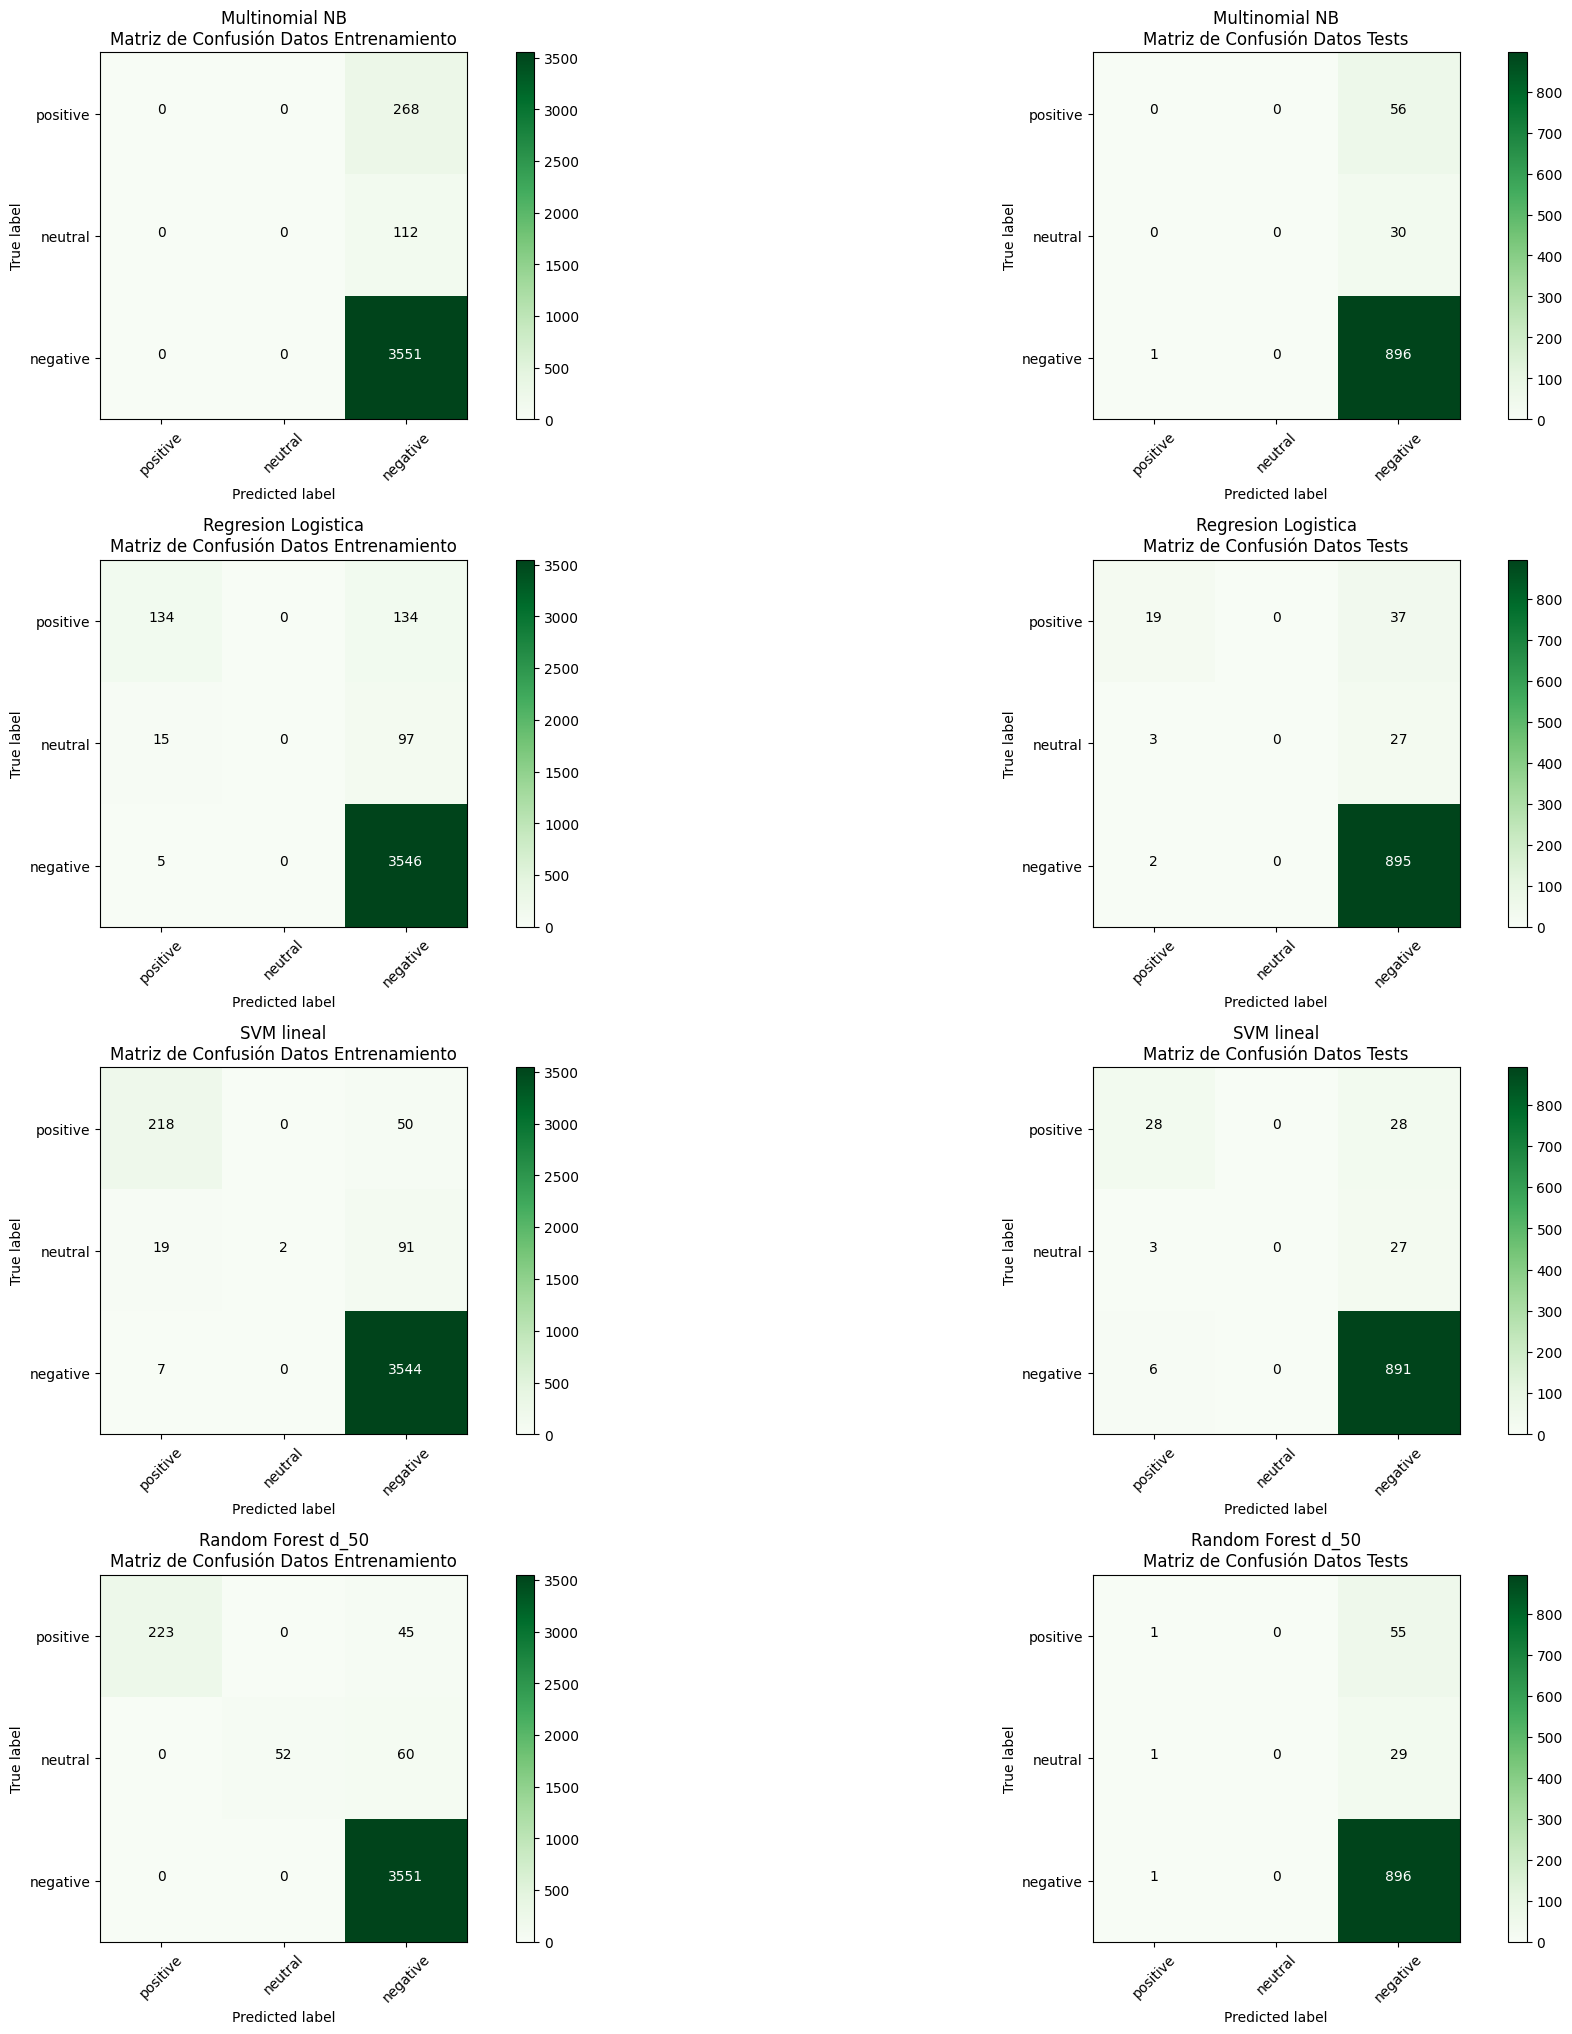

In [96]:
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(x_train)
    y_pred_test = v.predict(x_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 45))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

In [97]:
# Exportaremos los modelos 
import joblib

for k, v in clasificadores.items():
    joblib.dump(v, 'Results-Scikit/Models/{}.pkl'.format(k))

In [98]:
# Exportamos el vectorizador
joblib.dump(vectorizer, 'Results-Scikit/Vectorizer/vectorizer.pkl')

['Results-Scikit/Vectorizer/vectorizer.pkl']

In [99]:
import joblib

# Cargar el vectorizador y el modelo
vectorizer = joblib.load('Results-Scikit/Vectorizer/vectorizer.pkl')
mnb = joblib.load('Results-Scikit/Models/Multinomial NB.pkl')  # Asegúrate de usar el nombre exacto de tu archivo


In [100]:
import spacy

# Cargar el modelo de Spacy
nlp = spacy.load('en_core_web_sm')

# Frase de entrada
sentence = "it's very bad"

# Normalización de la frase de entrada
sentense = nlp(sentence.lower())
sentense1 = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                     and (len(word.text) > 2) and (not word.is_stop)])

# Vectorización de la frase normalizada
vectorized_sentence = vectorizer.transform([sentense1])

# Predicción de sentimiento
predicted_sentiment = mnb.predict(vectorized_sentence)

# Imprimir la predicción
print("Predicción de sentimiento:", predicted_sentiment)

Predicción de sentimiento: ['positive']
